https://towardsdatascience.com/create-your-own-k-nearest-neighbors-algorithm-in-python-eb7093fc6339

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Unpack the iris dataset, from UCI Machine Learning Repository
iris = datasets.load_iris()
X = iris['data']
y = iris['target']
# Preprocess data
X = StandardScaler().fit_transform(X)
# Split data into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, np.unique(y_train))

(120, 4) [0 1 2]


In [3]:
# find the most common class among the k nearest data points
def most_common(lst):
    '''Returns the most common element in a list'''
    return max(set(lst), key=lst.count)

### euclidean distance

In [4]:
def euclidean(point, data):
    '''Euclidean distance between a point  & data'''
    return np.sqrt(np.sum((point - data)**2, axis=1))

In [5]:
euclidean(X_train[0], X_train[:10])

array([0.        , 2.20252202, 3.8973283 , 4.08530848, 1.973987  ,
       1.43568964, 4.91983379, 1.89712158, 1.27124838, 1.67070371])

In [6]:
class KNeighborsClassifier():
    
    def __init__(self, k=5, dist_metric=euclidean):
        self.k = k
        self.dist_metric = dist_metric
        
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        
    def predict(self, X_test):
        neighbors = [] # list of k nearest neighbors of each X_test
        for x in X_test:
            distances = self.dist_metric(x, self.X_train) # list of distance of x and all X_train
            y_sorted = [y for distance, y in sorted(zip(distances, self.y_train))]
            neighbors.append(y_sorted[:self.k])
        return list(map(most_common, neighbors)) # apply most_common function to all lists in neighbors 
    
    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)
        accuracy = sum(y_pred == y_test) / len(y_test)
        return accuracy

In [7]:
model = KNeighborsClassifier(k=6)
model.fit(X_train, y_train)
model.predict(X_test[:4])
y_test[:4]


zip(euclidean(X_test[0], X_train[:10]), y_train[:10])

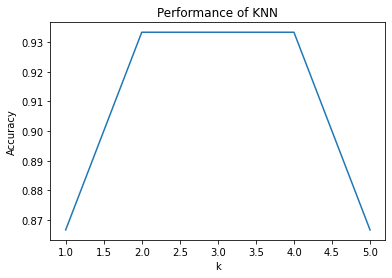

In [8]:
accuracies = []
ks = range(1, 6)
for i in ks:
    knn = KNeighborsClassifier(k=i)
    knn.fit(X_train, y_train)
    accuracy = knn.evaluate(X_test, y_test)
    accuracies.append(accuracy)
fig, ax = plt.subplots()
ax.plot(ks, accuracies)
ax.set(xlabel="k",
       ylabel="Accuracy",
       title="Performance of KNN")
plt.show()